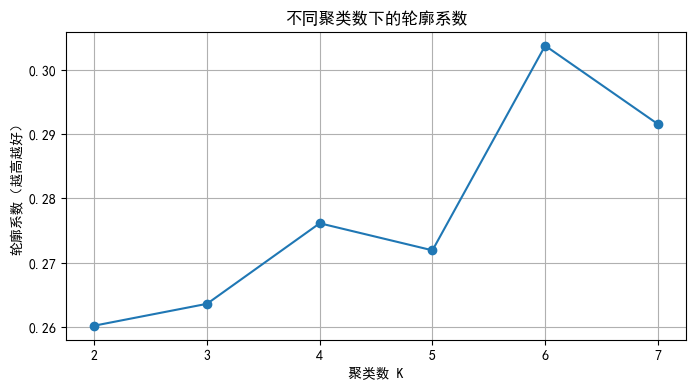

In [3]:
# 📌 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.rcParams['font.sans-serif'] = ['SimHei']        # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False 

# 📌 读取数据
df = pd.read_csv("C:/Users/Administrator/Desktop/traffic_speed_data.csv")

# ✅ 1. 编码非数值列（车型、时间段）
le_type = LabelEncoder()
df['车型编码'] = le_type.fit_transform(df['车型'])

le_time = LabelEncoder()
df['时间段编码'] = le_time.fit_transform(df['时间段'])

# ✅ 2. 准备聚类特征（速度 + 编码列）
X = df[['速度', '车型编码', '时间段编码']]

# ✅ 3. 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 4. 用轮廓系数（silhouette score）找最优聚类数
scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    scores.append(score)

# ✅ 5. 可视化轮廓分数
plt.figure(figsize=(8, 4))
plt.plot(k_range, scores, marker='o')
plt.title("不同聚类数下的轮廓系数")
plt.xlabel("聚类数 K")
plt.ylabel("轮廓系数（越高越好）")
plt.grid(True)
plt.show()


In [5]:
cluster_labels

array([3, 0, 0, 3, 3, 4, 0, 4, 3, 3, 3, 1, 3, 5, 4, 4, 0, 0, 4, 2, 3, 4,
       2, 0, 0, 3, 3, 3, 4, 6, 4, 0, 5, 3, 3, 5, 5, 6, 0, 3, 2, 3, 2, 6,
       6, 0, 4, 3, 5, 3, 1, 1, 3, 0, 3, 0, 4, 4, 2, 0, 3, 3, 0, 0, 3, 5,
       6, 0, 4, 5, 3, 5, 4, 1, 4, 2, 4, 6, 3, 6, 2, 1, 1, 0, 3, 2, 3, 0,
       0, 1, 0, 0, 5, 3, 3, 1, 2, 4, 1, 4, 2, 3, 2, 4, 2, 3, 2, 4, 2, 2,
       0, 1, 0, 2, 3, 4, 5, 3, 0, 0, 4, 4, 3, 2, 0, 4, 2, 0, 4, 0, 0, 4,
       0, 6, 2, 1, 4, 4, 3, 5, 6, 1, 4, 0, 4, 2, 2, 3, 4, 0, 2, 1, 5, 3,
       6, 2, 2, 2, 6, 6, 3, 0, 0, 6, 3, 1, 1, 1, 2, 3, 6, 4, 3, 4, 0, 2,
       3, 3, 0, 1, 1, 3, 5, 2, 4, 6, 3, 5, 3, 2, 3, 3, 4, 2, 3, 2, 3, 4,
       0, 2, 2, 6, 3, 4, 4, 6, 4, 4, 3, 1, 2, 3, 5, 2, 2, 0, 0, 0, 4, 3,
       5, 3, 3, 0, 2, 3, 4, 1, 5, 6, 3, 4, 4, 0, 4, 0, 5, 2, 2, 0, 3, 3,
       5, 4, 2, 5, 4, 0, 6, 5, 3, 6, 0, 6, 6, 1, 3, 1, 0, 2, 6, 5, 0, 6,
       1, 5, 5, 4, 1, 5, 2, 4, 4, 4, 5, 0, 0, 3, 6, 2, 6, 6, 1, 1, 2, 2,
       0, 1, 6, 0, 4, 3, 4, 1, 2, 6, 2, 1, 1, 0, 4,